# Определение перспективного тарифа для телеком компании


**Цели и задачи проекта:** проанализировать на небольшой выборке данных поведение клиентов оператора сотовой связи компании «Мегалайн», использующих тарифы "Смарт" и "Ультра", с целью определения, какой тариф обеспечивает бо́льшую выручку и от чего она зависит. 

**Входные данные:** выборка данных 500-т пользователей «Мегалайна» с информацией о пользователе (имя, возраст, местожительство, подключенный тариф и др.), звонках/сообщениях/интернет-сессии (дата, длительность звонка, объем трафика) и данных о тарифах (абонентская плата, пакеты услуг, условия сверх тарифного пакета).   

**Обозначения категорий исходных данных:**
Исходные данные для проекта содержатся в пяти файлах формата csv. Обозначения переменных для каждого датасета приведены ниже:

1) Информация о пользователях (users.csv)
* *user_id* — уникальный идентификатор пользователя
* *first_name* — имя пользователя
* *last_name* — фамилия пользователя
* *age* — возраст пользователя (годы)
* *reg_date* — дата подключения тарифа (день, месяц, год)
* *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* *city* — город проживания пользователя
* *tariff* — название тарифного плана

2) Информация о звонках (calls.csv)
* *id* — уникальный номер звонка
* *call_date* — дата звонка
* *duration* — длительность звонка в минутах
* *user_id* — идентификатор пользователя, сделавшего звонок

3) Информация о сообщениях (messages.csv)
* *id* — уникальный номер сообщения
* *message_date* — дата сообщения
* *user_id* — идентификатор пользователя, отправившего сообщение

4) Информация об интернет-сессиях (internet.csv)
* *id* — уникальный номер сессии
* *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
* *session_date* — дата интернет-сессии
* *user_id* — идентификатор пользователя

5) Информация о тарифах (tariffs.csv)
* *tariff_name* — название тарифа
* *rub_monthly_fee* — ежемесячная абонентская плата в рублях
* *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
* *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
* *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
* *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


**План работы** над проектом включает в себя выполнение следующих шагов:
* *Импорт данных и изучение общей информации.* На этом этапе получаем общую информацию об имеющихся у нас в распоряжении данных, их типах, полноте и правильности представления. Предварительно оцениваем объем данных в каждом датасете, их минимальные и максимальные значения, присутствие пропусков и дубликатов. 
* *Подготовка данных.* В этой части работы обращаем пристальное внимание на недостатки исходных данных и их релевантность: анализируем пропуски, оцениваем необходимость обработки пропусков в данных, преобразуем данные в верный тип, проверяем их на присутствие ошибочных значений и обрабатываем дубликаты (если присутствуют) с целью исключения искажений в результатах. Удаляем неинформативные данные, объединяем датасеты и производим вычисления ежемесячной выручки.    
* *Анализ данных.* Данный этап позволяет охарактеризовать поведение пользователей (продолжительность телефонных разговоров, количество смс и израсходованного интернет-трафика) для обоих тарифов, а также ответить на вопросы, каким образом и в какой степени та или иная характеристика оказывает влияние на ежемесячную выручку компании. Указанные зависимости отражаются в сводных таблицах и графиках по результатам группировки, подсчету и агрегирования различных данных. Статистический анализ позволяет критически оценить полученные результаты и их достоверность.
* *Проверка гипотез.* В этой части работы формулируются гипотезы о степени влияния различных параметров (используемого тарифного плана или местожительства) на среднюю выручку компании и проводится ее оценка методами статистики с использованием принципов центральной предельной теоремы.
* *Формулирование общего вывода*. На заключительном этапе приводится сумма выводов и рекомендаций по каждой части выполненного проекта. В общем выводе мы отразим на основе имеющейся выборки ключевые рекомендации о вкладе рассматриваемых тарифных планов в общую выручку компании.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-данных-и-изучение-общей-информации" data-toc-modified-id="Импорт-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт данных и изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Информация-о-пользователях" data-toc-modified-id="Информация-о-пользователях-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Информация о пользователях</a></span></li><li><span><a href="#Информация-о-звонках" data-toc-modified-id="Информация-о-звонках-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Информация о звонках</a></span></li><li><span><a href="#Информация-о-cообщениях" data-toc-modified-id="Информация-о-cообщениях-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Информация о cообщениях</a></span></li><li><span><a href="#Информация-об-интернет-сессиях" data-toc-modified-id="Информация-об-интернет-сессиях-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Информация об интернет-сессиях</a></span></li><li><span><a href="#Информация-о-тарифах" data-toc-modified-id="Информация-о-тарифах-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Информация о тарифах</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-формата-данных-и-представление-датафреймов" data-toc-modified-id="Обработка-формата-данных-и-представление-датафреймов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка формата данных и представление датафреймов</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Ежемесячная-выручка" data-toc-modified-id="Ежемесячная-выручка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ежемесячная выручка</a></span></li><li><span><a href="#Анализ-звонков,-сообщений-и-интернет-трафика" data-toc-modified-id="Анализ-звонков,-сообщений-и-интернет-трафика-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ звонков, сообщений и интернет-трафика</a></span><ul class="toc-item"><li><span><a href="#Длительность-звонков" data-toc-modified-id="Длительность-звонков-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Длительность звонков</a></span></li><li><span><a href="#Количество-сообщений" data-toc-modified-id="Количество-сообщений-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Количество сообщений</a></span></li><li><span><a href="#Объем-интернет-трафика" data-toc-modified-id="Объем-интернет-трафика-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Объем интернет-трафика</a></span></li></ul></li><li><span><a href="#Оценка-влияния-выбросов" data-toc-modified-id="Оценка-влияния-выбросов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Оценка влияния выбросов</a></span></li></ul></li><li><span><a href="#Проверка-гипотез-о-равенстве-средних" data-toc-modified-id="Проверка-гипотез-о-равенстве-средних-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез о равенстве средних</a></span><ul class="toc-item"><li><span><a href="#Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»" data-toc-modified-id="Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cредняя выручка пользователей тарифов «Ультра» и «Смарт»</a></span></li><li><span><a href="#Cредняя-выручка-пользователей-из-Москвы-и-других-регионов" data-toc-modified-id="Cредняя-выручка-пользователей-из-Москвы-и-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cредняя выручка пользователей из Москвы и других регионов</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Импорт данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from functools import reduce
from scipy import stats as st

In [2]:
df_users = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

Получим предварительную информацию о имеющихся датасетах:

In [56]:
def general_info(dataframe):
    """
    Функция дает краткую информацию о датафрейме, максимальных и минимальных значениях численных переменных
    и присутствии дубликатов в данных
    """
    # Вывод всех колонок датафрейма и его 10 рандомных строк
    print('')
    print('\033[1m' + 'Информация, включающая 10 произвольных записей датафрейма:' + '\033[0m')
    pd.set_option('display.max_columns', None)
    display(dataframe.sample(10, random_state=1), )
    
    # Вывод информации о размере датафрейма, типе данных и пропущенных/минимальных/максимальных значениях 
    print('\033[1m' + 'Информация о размере датафрейма, типе данных и пропущенных значениях:' + '\033[0m')
    dataframe.info()
    print('')
    print('\033[1m' + 'Информация о минимальных/максимальных значениях для численных параметров:' + '\033[0m')
    display(dataframe.describe().loc[['min','max']])
      
    # Вывод информации о количестве дубликатов
    duplicates_amount = dataframe.duplicated().sum()
    print('\033[1m' + 'Количество дубликатов в данных:'+ '\033[0m', duplicates_amount)

### Информация о пользователях

In [4]:
general_info(df_users)


Информация, включающая 10 произвольных записей датафрейма:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
304,1304,68,NaN,Владимир,Илья,Соловьёв,2018-11-05,ultra
340,1340,50,NaN,Пенза,Тимофей,Алютин,2018-01-30,smart
47,1047,67,NaN,Саратов,Милица,Меркулова,2018-10-29,smart
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart
485,1485,34,NaN,Киров,Таисия,Сухова,2018-12-29,ultra
310,1310,28,NaN,Уфа,Рудольф,Нестеров,2018-03-22,ultra
31,1031,66,NaN,Москва,Лаврентий,Тимофеев,2018-11-02,smart
249,1249,25,NaN,Курск,Изольда,Авдушева,2018-08-14,smart
90,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra


Информация о размере датафрейма, типе данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Информация о минимальных/максимальных значениях для численных параметров:


,user_id,age
min,1000.0,18.0
max,1499.0,75.0


Количество дубликатов в данных: 0


Количество уникальных населенных пунктов в выборке:

In [5]:
len(df_users['city'].unique())

76

* Исходный датафрейм содержит 500 записей с информацией о пользователях, разделенной по 8-ми параметрам-характеристикам.
* Дата прекращения пользования тарифом указана для 38 пользователей. В остальных случаях тариф ещё действовал на момент выгрузки данных и эти пропуски предобрабатываться не будут.
* Колонки churn_date и reg_date требуют преобразования типов данных из object в datetime64.
* Возраст клиентов, представленных в выборке, от 18 до 75 лет.
* Количество уникальных населенных пунктов в выборке - 76.

### Информация о звонках

In [6]:
general_info(df_calls)


Информация, включающая 10 произвольных записей датафрейма:


,id,call_date,duration,user_id
26953,1066_374,2018-08-26,0.00,1066
66122,1168_1273,2018-03-28,16.05,1168
67325,1171_350,2018-09-14,6.23,1171
74643,1186_465,2018-09-02,0.79,1186
192311,1472_124,2018-05-04,5.94,1472
47375,1118_664,2018-10-24,13.41,1118
91143,1227_563,2018-08-03,15.15,1227
3818,1010_67,2018-08-16,14.29,1010
182822,1454_574,2018-09-23,9.98,1454
187346,1463_0,2018-12-05,10.63,1463


Информация о размере датафрейма, типе данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Информация о минимальных/максимальных значениях для численных параметров:


,duration,user_id
min,0.0,1000.0
max,38.0,1499.0


Количество дубликатов в данных: 0


Из данных о продолжительности телефонных разговоров следует, что присутствуют звонки длительностью 0 мин. Оценим процент таких звонков:

In [7]:
missed_calls = (len(df_calls[df_calls['duration'] == 0]))/ len(df_calls)
print('Количество пропущенных звонков: {:.1%}'.format(missed_calls))

Количество пропущенных звонков: 19.6%


Оценим также среднюю продолжительность состоявшегося телефонного разговора:

In [8]:
calls_mean_duration = df_calls.loc[df_calls['duration'] > 0, 'duration'].mean()
print('Средняя продолжительность состоявшегося разговора (мин): {:.1f}'.format(calls_mean_duration))

Средняя продолжительность состоявшегося разговора (мин): 8.4


* Исходный датафрейм содержит 202607 записей с информацией о звонках, разделенной по 4-м параметрам-характеристикам.
* Исходный датафрейм не имеет пропусков и дубликатов.
* Название колонки id требует переименования в id_calls, чтобы избежать совпадений с названиями колонок в других датафреймах проекта. Тип данных колонки id требует дополнительного изучения. 
* Колонка call_date требует преобразования в тип данных datetime64.
* Значения колонки duration можно округлить до следующего целого числа, т.к. по условиям проекта, «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Тип данных изменить на int64.
* Минимальная продолжительность звонка составляла 0 мин (звонок мог быть пропущен или сброшен), максимальная продолжительность разговора - 38 минут.
* Доля пропущенных (несостоявшихся) звонков в имеющейся выборке - 19,6%. Средняя продолжительность состоявшегося разговора около 9 минут.

### Информация о cообщениях

In [9]:
general_info(df_messages)


Информация, включающая 10 произвольных записей датафрейма:


,id,message_date,user_id
45696,1197_26,2018-12-31,1197
66091,1282_523,2018-11-30,1282
18743,1082_184,2018-10-18,1082
33759,1146_557,2018-12-22,1146
11403,1048_49,2018-09-27,1048
97793,1401_125,2018-08-10,1401
406,1000_406,2018-12-29,1000
71393,1302_221,2018-10-23,1302
103004,1420_11,2018-12-12,1420
53795,1238_208,2018-10-08,1238


Информация о размере датафрейма, типе данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Информация о минимальных/максимальных значениях для численных параметров:


,user_id
min,1000.0
max,1499.0


Количество дубликатов в данных: 0


* Исходный датафрейм содержит 123036 записей с информацией о сообщениях, разделенной по 3-м параметрам-характеристикам.
* Исходный датафрейм не имеет пропусков и дубликатов.
* Название колонки id требует переименования в id_messages, чтобы измежать совпадений с названиями колонок в других датафреймах проекта. Тип данных колонки id требует дополнительного изучения.
* Колонка message_date требует преобразования в тип данных datetime64.

### Информация об интернет-сессиях

In [10]:
general_info(df_internet)


Информация, включающая 10 произвольных записей датафрейма:


,Unnamed: 0,id,mb_used,session_date,user_id
35745,35745,1124_125,122.45,2018-12-03,1124
18383,18383,1064_102,320.60,2018-12-19,1064
59774,59774,1203_22,605.96,2018-06-17,1203
56317,56317,1188_123,781.73,2018-05-08,1188
52231,52231,1176_386,150.98,2018-08-20,1176
20276,20276,1068_26,389.65,2018-12-04,1068
82748,82748,1281_64,841.89,2018-11-07,1281
129266,129266,1431_300,461.23,2018-11-26,1431
46783,46783,1160_75,0.00,2018-08-15,1160
48492,48492,1168_260,336.06,2018-07-28,1168


Информация о размере датафрейма, типе данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Информация о минимальных/максимальных значениях для численных параметров:


,Unnamed: 0,mb_used,user_id
min,0.0,0.00,1000.0
max,149395.0,1724.83,1499.0


Количество дубликатов в данных: 0


* Исходный датафрейм содержит 149396 записей с информацией об интернет-сессиях, разделенной по 5-ти параметрам-характеристикам.
* Исходный датафрейм не имеет пропусков и дубликатов.
* Колонку 'Unnamed: 0' требуется удалить, т.к. она дублирует колонку с уникальными индексами записей.  
* Название колонки id требует переименования в id_web, чтобы избежать совпадений с названиями колонок в других датафреймах проекта. Тип данных колонки id требует дополнительного изучения.
* Колонка session_date требует преобразования в тип данных datetime64.
* Значения колонки mb_used требуется округлить до следующего целого числа, т.к. по условиям проекта, «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Тип данных преобразовать в int64.

### Информация о тарифах

In [11]:
display(df_tariffs)
print('\033[1m' + 'Информации о размере датафрейма, типе данных и пропущенных значениях:' + '\033[0m')
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Информации о размере датафрейма, типе данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
df_tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True)

Исходный датафрейм содержит две записи, характеризующие тарифные планы "Мегалайна". Информация разделена на 8-м параметров-характеристик. Пропуски отсутствуют, изменений в типах данных не требуется.

**Промежуточные выводы:**
* Представлены все необходимые данные для дальнейшей обработки и анализа.
* Колонки, представляющие информацию о датах, требуют преобразования в тип данных datetime64 для последующих операций с ними.
* Дубликаты в колонках отсутствуют, но ряд названий требуют переименований, чтобы избежать дублирований в сводном датафрейме.
* Число пользователей в представленной выборке - 500 человек.
* Возраст клиентов, представленных в выборке, от 18 до 75 лет.
* Количество уникальных населенных пунктов в выборке - 76.
* Минимальная продолжительность звонка составляла 0 мин (звонок мог быть пропущен или сброшен), максимальная продолжительность разговора - 38 минут.
* Доля пропущенных (несостоявшихся) звонков в имеющейся выборке - 19,6%. Средняя продолжительность состоявшегося разговора около 9 минут.

## Подготовка данных

### Обработка формата данных и представление датафреймов

Изменим тип данных представления даты в датафремах:

In [13]:
def datetime_change(dataframe, column):
    """
    Функция для изменения формата типа данных в datetime64.
    """
    dataframe[column] = pd.to_datetime(dataframe[column], format='%Y-%m-%dT%H')

In [14]:
datetime_change(df_users, 'churn_date')
datetime_change(df_users, 'reg_date')
datetime_change(df_calls, 'call_date')
datetime_change(df_messages, 'message_date')
datetime_change(df_internet, 'session_date')

Округлим продолжительность разговора и объем интернет-трафика до следующего целого числа. Изменим тип данных на int64:

In [15]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int64')
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil).astype('int64')

В исходных датафреймах переименуем колонки с одинаковыми названиями, обозначающие различные параметры:

In [16]:
df_calls.rename(columns = {'id':'id_calls'}, inplace = True)
df_messages.rename(columns = {'id':'id_messages'}, inplace = True)
df_internet.rename(columns = {'id':'id_web'}, inplace = True)

Удалим неинформативную колонку Unnamed: 0 в датафрейме df_internet:

In [17]:
df_internet.drop(['Unnamed: 0'], axis=1)

,id_web,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,0,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


Проверим интервал дат на соответствие заданию (2018 г.):

In [18]:
min(df_internet['session_date'])

Timestamp('2018-01-01 00:00:00')

In [19]:
max(df_internet['session_date'])

Timestamp('2018-12-31 00:00:00')

### Категоризация данных

Категоризируем даты совершенных звонков/интернет-сессий/отправленных смс по месяцам:

In [20]:
df_calls['month'] = df_calls['call_date'].dt.month_name().str.slice(stop=3)
df_messages['month'] = df_messages['message_date'].dt.month_name().str.slice(stop=3)
df_internet['month'] = df_internet['session_date'].dt.month_name().str.slice(stop=3)

Посчитаем для каждого пользователя в выборке общее количество сделанных звонков и израсходованных минут разговора по месяцам:

In [21]:
agg_calls = df_calls.groupby(['user_id', 'month']) \
                        .agg({'id_calls':'count', 'duration':'sum'}) \
                        .astype('Int64') \
                        .rename(columns = {'id_calls': 'number_calls_per_month', 'duration': 'total_minutes_spent_per_month'}) \
                        .reset_index()
agg_calls

,user_id,month,number_calls_per_month,total_minutes_spent_per_month
0,1000,Aug,52,408
1,1000,Dec,46,333
2,1000,Jul,47,340
3,1000,Jun,43,172
4,1000,May,22,159
...,...,...,...,...
3169,1498,Sep,59,471
3170,1499,Dec,69,492
3171,1499,Nov,74,612
3172,1499,Oct,68,449


Определим общее количество отправленных сообщений по месяцам каждым пользователем:

In [22]:
agg_messages = df_messages.groupby(['user_id', 'month']) \
                        .agg({'id_messages':'count'}) \
                        .astype('Int64') \
                        .rename(columns = {'id_messages': 'number_sms_spent_per_month'}) \
                        .reset_index()
agg_messages

,user_id,month,number_sms_spent_per_month
0,1000,Aug,81
1,1000,Dec,70
2,1000,Jul,75
3,1000,Jun,60
4,1000,May,22
...,...,...,...
2712,1498,Sep,44
2713,1499,Dec,66
2714,1499,Nov,59
2715,1499,Oct,48


Определим объем израсходованного интернет-трафика по месяцам для каждого пользователя:

In [23]:
agg_web = df_internet.groupby(['user_id', 'month']) \
                        .agg({'mb_used':'sum'}) \
                        .astype('Int64') \
                        .rename(columns = {'mb_used': 'total_mb_spent_per_month'}) \
                        .reset_index()
agg_web

,user_id,month,total_mb_spent_per_month
0,1000,Aug,14070
1,1000,Dec,9827
2,1000,Jul,14016
3,1000,Jun,23257
4,1000,May,2256
...,...,...,...
3198,1498,Sep,22166
3199,1499,Dec,13077
3200,1499,Nov,17984
3201,1499,Oct,17809


Объединим сводные данные с информацией о звонках, сообщениях и интернет-трафике и добавим к ним датафреймы с информацией о пользователях и тарифах:

In [24]:
dfs_list = [agg_web, agg_calls, agg_messages]
dfs_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), dfs_list).fillna(0)
users_dfs_merged = pd.merge(df_users, dfs_merged, how='outer', on='user_id')
df = pd.merge(users_dfs_merged, df_tariffs, how='outer', on='tariff')
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_mb_spent_per_month,number_calls_per_month,total_minutes_spent_per_month,number_sms_spent_per_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Aug,14070,52,408,81,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Dec,9827,46,333,70,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Jul,14016,47,340,75,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Jun,23257,43,172,60,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,2256,22,159,22,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,Sep,22166,59,471,44,50,15360,500,550,200,3,3
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,Dec,13077,69,492,66,50,15360,500,550,200,3,3
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,Nov,17984,74,612,59,50,15360,500,550,200,3,3
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,Oct,17809,68,449,48,50,15360,500,550,200,3,3


**Промежуточные выводы:**
* Подготовлен объединенный датафрейм с информацией о совершенных звонках, отправленных смс и проведенных интернет-сессиях.
* Данный сгруппированы на основе ежемесячной активности каждого пользователя с учетом выбранного тарифа и условий округления.

## Анализ данных

### Ежемесячная выручка

Оценим долю пользователей, пользующихся тарифами "Смарт" и "Ультра":

In [25]:
print('Доля пользователей в разрезе тарифов:')
df['tariff'].value_counts(normalize = True).round(2)

Доля пользователей в разрезе тарифов:


smart    0.69
ultra    0.31
Name: tariff, dtype: float64

Оценим минимальные и максимальные значения параметров-характеристик, с целью проверки их на логическое соответствие:

In [26]:
df.describe().loc[['min','max']]

,user_id,age,total_mb_spent_per_month,number_calls_per_month,total_minutes_spent_per_month,number_sms_spent_per_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
min,1000.0,18.0,0.0,0.0,0.0,0.0,50.0,15360.0,500.0,550.0,150.0,1.0,1.0
max,1499.0,75.0,49789.0,244.0,1673.0,224.0,1000.0,30720.0,3000.0,1950.0,200.0,3.0,3.0


Вычислим для каждого пользователя объем услуг оказываемых им сверх указанных в тарифах:

In [27]:
df['extra_minutes'] = (df['total_minutes_spent_per_month'] - df['minutes_included']).apply(lambda x: x if x>0 else 0)
df['extra_sms'] = (df['number_sms_spent_per_month'] - df['messages_included']).apply(lambda x: x if x>0 else 0)
df['extra_gb'] = (df['total_mb_spent_per_month'] - df['mb_per_month_included']).apply(lambda x: math.ceil(x/1024) if x>0 else 0)

Посчитаем общую ежемесячную выручку компании с каждого пользователя, складывающуюся из абонентской платы для соответствующего тарифа и переплат за счет оказания услуг сверх тарифного плана:

In [28]:
df['monthly_revenue'] = (df['extra_minutes']*df['rub_per_minute']) + (df['extra_sms']*df['rub_per_message']) + \
            (df['extra_gb']*df['rub_per_gb']) + df['rub_monthly_fee']

In [29]:
df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_mb_spent_per_month,number_calls_per_month,total_minutes_spent_per_month,number_sms_spent_per_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_minutes,extra_sms,extra_gb,monthly_revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Aug,14070,52,408,81,1000,30720,3000,1950,150,1,1,0,0,0,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Dec,9827,46,333,70,1000,30720,3000,1950,150,1,1,0,0,0,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Jul,14016,47,340,75,1000,30720,3000,1950,150,1,1,0,0,0,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Jun,23257,43,172,60,1000,30720,3000,1950,150,1,1,0,0,0,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,2256,22,159,22,1000,30720,3000,1950,150,1,1,0,0,0,1950


Оценим общую выручку компании от пользователей, входящих в выборку, а также доход компании сверх абонентской платы в разрезе тарифных планов:

In [30]:
print('Общая ежемесячная выручка для имеющейся выборки составляет:', df['monthly_revenue'].sum(), 'руб')

Общая ежемесячная выручка для имеющейся выборки составляет: 4928251 руб


In [31]:
monthly_revenue_total = df['monthly_revenue'].sum()
monthly_fee_total = df['rub_monthly_fee'].sum()
ratio_pct = (100 - (monthly_fee_total *100 / monthly_revenue_total)).round(1)
extra_revenue = monthly_revenue_total - monthly_fee_total
print(f'Выручка компании от абонентской платы: {monthly_fee_total} руб.')
print(f'Переплаты пользователей сверх тарифов составляют: {extra_revenue} руб. или {ratio_pct} % от общей выручки')

Выручка компании от абонентской платы: 3149200 руб.
Переплаты пользователей сверх тарифов составляют: 1779051 руб. или 36.1 % от общей выручки


In [32]:
monthly_revenue_total_smart = df.loc[df['tariff'] == 'smart', 'monthly_revenue'].sum()
monthly_revenue_total_ultra = df.loc[df['tariff'] == 'ultra', 'monthly_revenue'].sum()
print(f'Общая выручка компании от тарифа "Смарт": {monthly_revenue_total_smart} руб.')
print(f'Общая выручка компании от тарифа "Ультра": {monthly_revenue_total_ultra} руб.')

monthly_fee_total_smart = df.loc[df['tariff'] == 'smart', 'rub_monthly_fee'].sum()
monthly_fee_total_ultra = df.loc[df['tariff'] == 'ultra', 'rub_monthly_fee'].sum()

extra_revenue_smart = monthly_revenue_total_smart - monthly_fee_total_smart
extra_revenue_ultra = monthly_revenue_total_ultra - monthly_fee_total_ultra

ratio_smart_pct = (extra_revenue_smart *100 / extra_revenue).round(1)
ratio_ultra_pct = (extra_revenue_ultra *100 / extra_revenue).round(1)

print(f'Переплаты пользователей сверх тарифа "Смарт" составляют: {extra_revenue_smart} руб. или {ratio_smart_pct} % \
от всего объема переплат, по тарифу "Ультра": {extra_revenue_ultra} руб. или {ratio_ultra_pct} %.')

Общая выручка компании от тарифа "Смарт": 2886301 руб.
Общая выручка компании от тарифа "Ультра": 2041950 руб.
Переплаты пользователей сверх тарифа "Смарт" составляют: 1659801 руб. или 93.3 % от всего объема переплат, по тарифу "Ультра": 119250 руб. или 6.7 %.


Средняя ежемесячная выручка компании с пользователя для каждого из тарифов составляет:

In [33]:
revenue_per_client_smart = monthly_revenue_total_smart / df.loc[df['tariff'] == 'smart', 'monthly_revenue'].count()
print('Средняя ежемесячная выручка компании с пользователя на тарифе "Смарт" составляет (руб.):', \
          revenue_per_client_smart.round(0))

Средняя ежемесячная выручка компании с пользователя на тарифе "Смарт" составляет (руб.): 1294.0


In [34]:
revenue_per_client_ultra = monthly_revenue_total_ultra / df.loc[df['tariff'] == 'ultra', 'monthly_revenue'].count()
print('Средняя ежемесячная выручка компании с пользователя на тарифе "Ультра" составляет (руб.):', \
          revenue_per_client_ultra.round(0))

Средняя ежемесячная выручка компании с пользователя на тарифе "Ультра" составляет (руб.): 2071.0


Ежемесячная общая выручка в разрезе тарифов "Ультра" и "Смарт" из имеющейся выборки представлена на графиках:

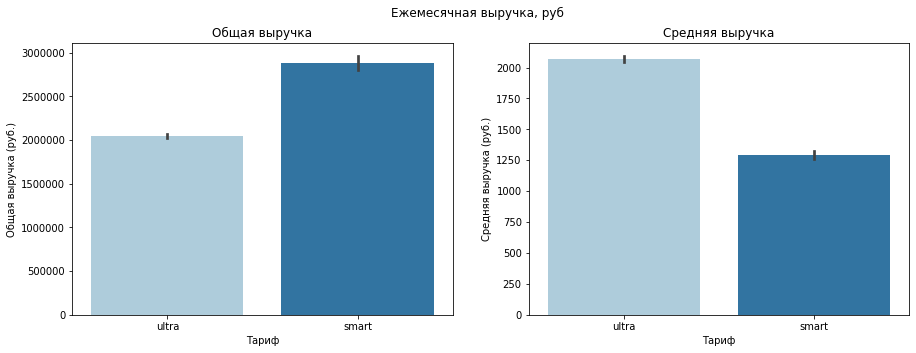

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

fig.suptitle('Ежемесячная выручка, руб')
g = sns.barplot(ax=axes[0], x='tariff', y='monthly_revenue', data=df, estimator=sum, palette = 'Paired')
g.set_xticklabels(g.get_xticklabels())
g.set_title('Общая выручка')
g.set_ylabel('Общая выручка (руб.)')
g.set_xlabel('Тариф')

g = sns.barplot(ax=axes[1], x='tariff', y='monthly_revenue', data=df, palette = 'Paired')
g.set_xticklabels(g.get_xticklabels())
g.set_title('Средняя выручка')
g.set_ylabel('Средняя выручка (руб.)')
g.set_xlabel('Тариф')

plt.show()

Из графиков видно, что основная выручка компании связана с поступлением от пользователей, заключивших договор на тариф "Смарт", и являющийся более привлекательным для большего числа людей, чем тариф "Ультра". Следует однако отметить, что пользователи тарифа "Смарт" обеспечивают бо́льшую выручку за счет значительных переплат за услуги сверх тарифного плана "Смарт" (93.3 % от всего объема переплат пользователей в выборке).  

Рассмотрим также распределение ежемесячной выручки для двух тарифов:

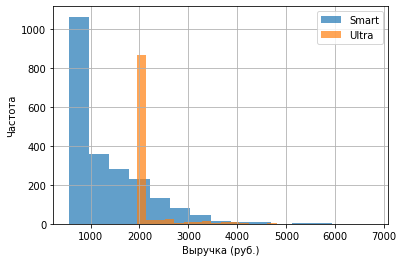

In [36]:
df_monthly_revenue_smart = df.query('tariff == "smart"')
df_monthly_revenue_ultra = df.query('tariff == "ultra"')

ax = df_monthly_revenue_smart.plot(
    kind='hist',
    y='monthly_revenue',
    histtype='barstacked',
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='Smart'
)
    
df_monthly_revenue_ultra.plot(
    kind='hist',
    y='monthly_revenue',
    histtype='barstacked',
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='Ultra',
    ax=ax,
    grid=True,
    legend=True
)

plt.xlabel('Выручка (руб.)')
plt.ylabel('Частота')

plt.show()

# Альтернативой matplotlib для такой диаграммы может служить метод 
# с использованием seaborn (модуль histplot не установлен в тренажере):
# sns.histplot(x='monthly_revenue', data = df, hue='tariff')

График наглядно показывает пики, характеризующие гарантированную ежемесячную выручку компании, близкую к соответствующим размерам абонентской платы для каждого тарифа. На гистограмме также видно ярко выраженное смещение распределение по выручке вправо для тарифа "Смарт", связанное с дополнительными расходами пользователей (зачастую значительными) сверх этого тарифного плана. Для тарифного плана "Ультра" дополнительные расходы пользователей сверх абонентской платы минимальны.

### Анализ звонков, сообщений и интернет-трафика

Проанализируем статистические показатели по длительности звонков, числу смс, интернет-трафику и ежемесячной выручке и сведем данные в таблицу:

In [37]:
df_stat = df.groupby('tariff')[['total_minutes_spent_per_month', 'number_sms_spent_per_month', \
                                'total_mb_spent_per_month', 'monthly_revenue']] \
                                    .agg(['mean', 'median', 'std', 'var']) \
                                    .astype('int64')
df_stat.style.set_properties(**{'text-align': 'right'})

Используя функцию, в последующих разделах постром диаграммы размаха и гистограммы распределения.

In [38]:
def plots_initial(parameter):
    """
    Функция строит диаграммы размаха и гистограммы распределения.
    """
    # Построение диаграммы размаха
    g = sns.FacetGrid(df, col='tariff', height=5)
    g.map(sns.boxplot, parameter, order=['ultra', 'smart'], color='#fec44f', showmeans=True)
    g.fig.suptitle(f'Диаграммы размаха {parameter} для тарифного плана:')
    g.fig.subplots_adjust(top=0.85)
    g.set_titles(col_template='{col_name}')
    
    # Построение гистограммы распределения
    g = sns.FacetGrid(df, col='tariff', height=5)
    g.map(plt.hist, parameter, bins = 12, color='#41ab5d')  
    g.fig.suptitle(f'Гистограммы распределения {parameter} для тарифного плана:')
    g.fig.subplots_adjust(top=0.85)
    g.set_titles(col_template='{col_name}')
    g.set_ylabels('Count')

#### Длительность звонков

Построим диаграммы размаха и гистограммы распределения по длительности телефонных звонков в месяц:

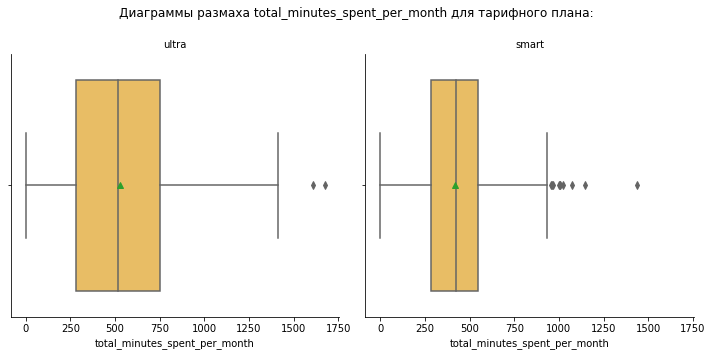

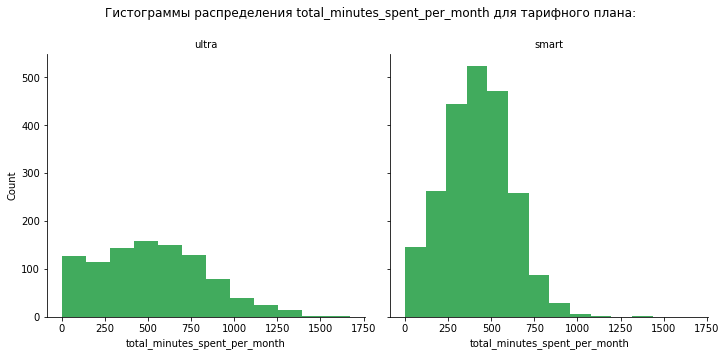

In [39]:
plots_initial('total_minutes_spent_per_month')

Длительность телефонных разговоров для двух тарифов ожидаемо различается. Распределение ежемесячной длительности телефонных разговоров близко к нормальному. Следует отметить две характерные особенности:
* в тарифе "Смарт" присутствует бо́льшее количество пользователей, которые превышают отведенное тарифом время на телефонные разговоры, чем в тарифе "Ультра". Наглядно это показано на диаграмме размаха.
* средние и медианные значения длительности звонков достаточно близки для обоих тарифов, при этом среднеквадратическое отклонение достаточно высокое, что характеризует как различное поведение клиентов при пользовании тарифом, так и определяется имеющейся выборкой.

#### Количество сообщений

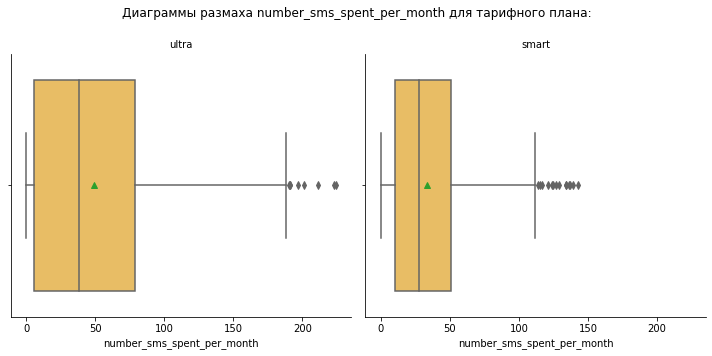

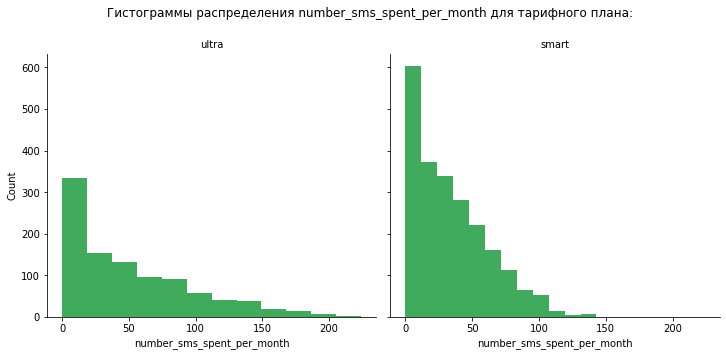

In [40]:
plots_initial('number_sms_spent_per_month')

Количество отправляемых ежемесячно смс в представленной выборке характеризуется снижением с увеличением их числа. Зависимость близка к линейной. Отмечается высокая доля пользователей, которая либо не отправляет смс, либо обходится их минимальным количеством. Тем не менее, в обоих тарифных планах имеется небольшое число клиентов, для которых ежемесячная активность по отправке смс достаточно высока в сравнении со средними / медианными значениями.   

#### Объем интернет-трафика

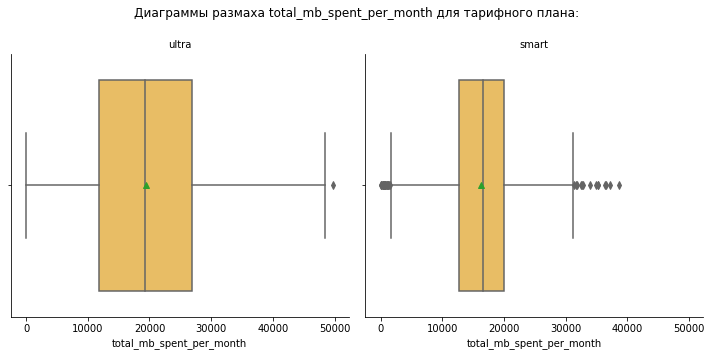

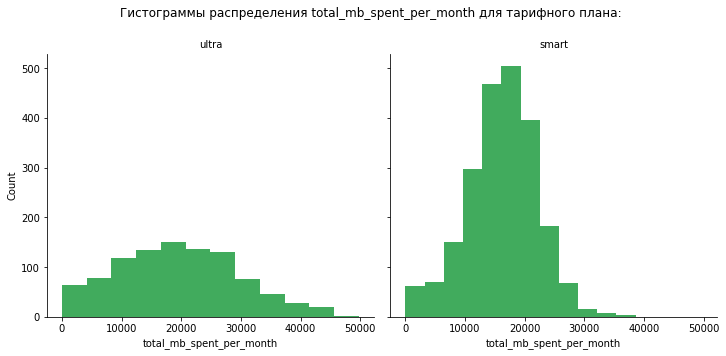

In [41]:
plots_initial('total_mb_spent_per_month')

Средний объем интернет-трафика (16±6 Гб - для "Смарт" и 19±10 Гб - для "Ультра"), расходуемого пользователями обоих тарифов ежемесячно, достаточно близок, несмотря на имеющиеся ограничения тарифного плана "Смарт". Распределения близки к нормальным, но диаграмма размаха указывает на то, что для небольшого числа пользователей тарифом "Смарт" характерно минимальное пользование интернетом (экономный вариант). Особенностью является наличие значительного числа пользователей, для которых характерно превышение доступных лимитов в 15 Гб. Доля таких пользователей для тарифа "Ультра" (лимит - 30 Гб) значительно ниже.

Графики распределения позволяют предложить две стратегии для дальнейшего анализа данных:

1) Не использовать обработку выбросов, что позволяют судить о поведенческих характеристиках клиентов при пользовании различными тарифами. Преимуществом данного подхода является то, что мы не отбрасываем редкие значения, которые в данном случае являются лишь маленькими или большими значениями, а не ошибками данных. Например, максимальная продолжительность звонка составляет 38 минут, что не может являться чем-то необычным, в особенности для тарифа с большим числом доступных минут. 

2) Обработывать выбросы лишь с целью получить поведение "среднего клиента" для разработки новых условий или совершенствования существующих тарифов.

Первая стратегия не требует дополнительной обработки объединенного датафрейма и будет использоваться в качестве базовой. Второй подход будет кратко представлен в разделе 3.4 путем сокращения выборки за счет более редких данных.

### Оценка влияния выбросов

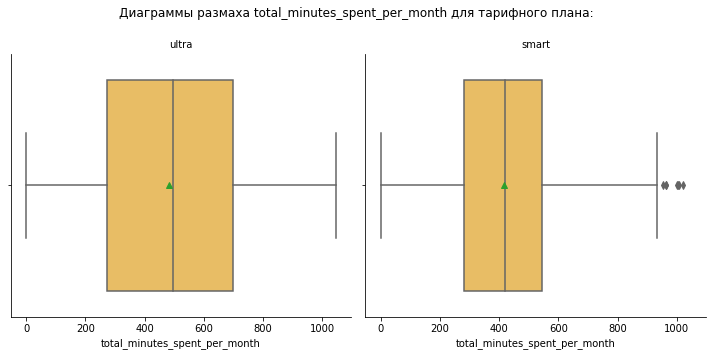

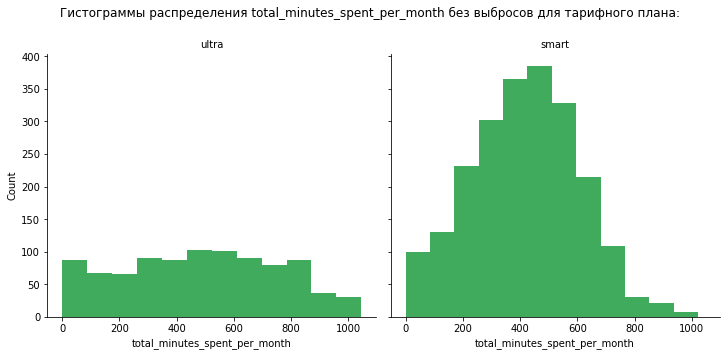

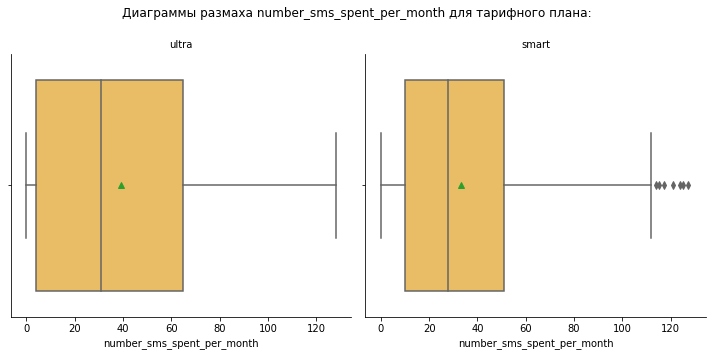

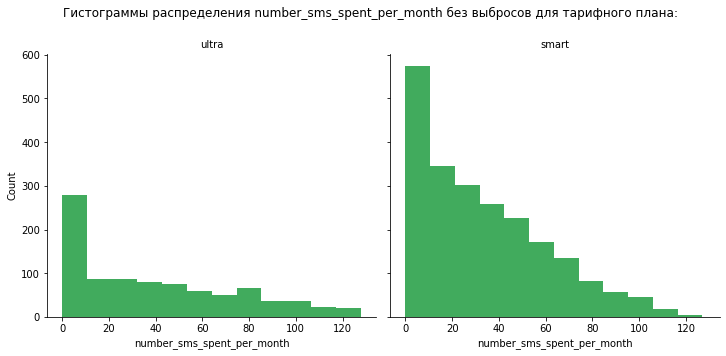

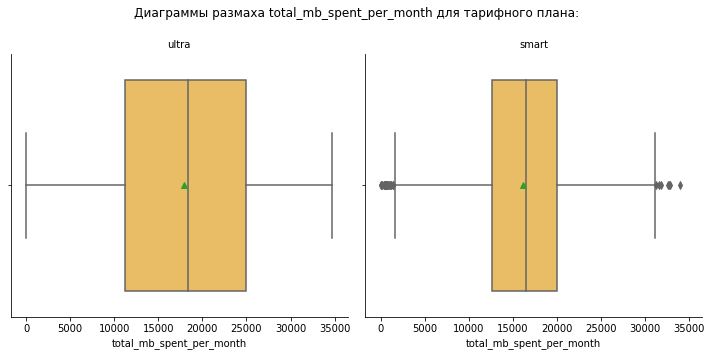

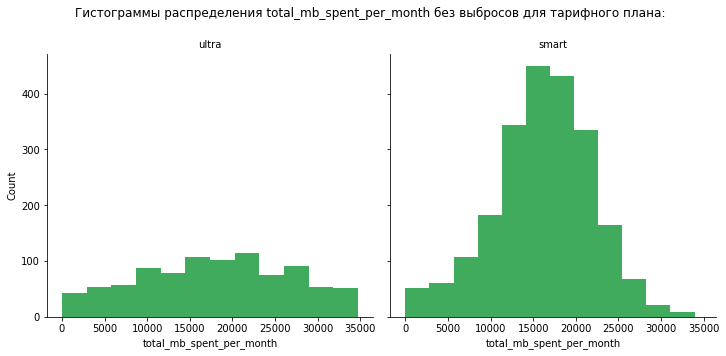

In [42]:
dict_of_dfs = dict()

def plots_without_outliers(parameter):
    """
    Функция исключает редкие значения из условия, что они не входят в полуторный межквартильный (Q1-Q3) размах. 
    Функция также стороит диаграмы размаха и гистограммы распределения для интересующих параметров, перечисленных в словаре.
    Полученные данные возвращаются в виде датафреймов с уникальными именами.
    """
    Q1 = df[parameter].quantile(0.25)
    Q3 = df[parameter].quantile(0.75)
    IQR = Q3 - Q1
    df_without_outliers = df[(df[parameter] > (Q1-1.5*IQR)) & (df[parameter] < (Q3+1.5*IQR))]

    g = sns.FacetGrid(df_without_outliers, col='tariff', height=5)
    g.map(sns.boxplot, parameter, order=['ultra', 'smart'], color='#fec44f', showmeans=True)
    g.fig.suptitle(f'Диаграммы размаха {parameter} для тарифного плана:')
    g.fig.subplots_adjust(top=0.85)
    g.set_titles(col_template='{col_name}')
      
    g = sns.FacetGrid(df_without_outliers, col='tariff', height=5)
    g.map(plt.hist, parameter, bins = 12, color='#41ab5d')  
    g.fig.suptitle(f'Гистограммы распределения {parameter} без выбросов для тарифного плана:')
    g.fig.subplots_adjust(top=0.85)
    g.set_titles(col_template='{col_name}')
    g.set_ylabels('Count')
    
    return df_without_outliers

for column in ['total_minutes_spent_per_month', 'number_sms_spent_per_month', 'total_mb_spent_per_month']:
    dict_of_dfs['df_without_outliers_' + column] = (
        plots_without_outliers(column)
    )

После обработки редких и выпадающих значений, гистограммы распределения по длительности звонков и интернет-сессий для "среднего клиента" каждого тарифа в целом сохранили свой вид, близкий к нормальному. Количественные оценки изменений средних/медианных значений приведены в сводных таблицах ниже:

Удалим строки с выбросами из объединенного датафрейма из условия, что хотя бы в одной переменной-характеристике имеется выброс:

In [43]:
Q1_calls = df['total_minutes_spent_per_month'].quantile(0.25)
Q3_calls = df['total_minutes_spent_per_month'].quantile(0.75)
IQR_calls = Q3_calls - Q1_calls

Q1_web = df['total_mb_spent_per_month'].quantile(0.25)
Q3_web = df['total_mb_spent_per_month'].quantile(0.75)
IQR_web = Q3_web - Q1_web

Q1_sms = df['number_sms_spent_per_month'].quantile(0.25)
Q3_sms = df['number_sms_spent_per_month'].quantile(0.75)
IQR_sms = Q3_sms - Q1_sms

In [44]:
df_without_outliers = df.copy()

In [45]:
df_without_outliers.drop(df_without_outliers \
                         [df_without_outliers['total_minutes_spent_per_month'] > (Q3_calls + 1.5*IQR_calls)] \
                         .index, inplace = True)
df_without_outliers.drop(df_without_outliers \
                         [df_without_outliers['total_minutes_spent_per_month'] < (Q1_calls - 1.5*IQR_calls)] \
                         .index, inplace = True)

In [46]:
df_without_outliers.drop(df_without_outliers \
                         [df_without_outliers['total_mb_spent_per_month'] > (Q3_web + 1.5*IQR_web)] \
                         .index, inplace = True)
df_without_outliers.drop(df_without_outliers \
                         [df_without_outliers['total_mb_spent_per_month'] < (Q1_web - 1.5*IQR_web)] \
                         .index, inplace = True)

In [47]:
df_without_outliers.drop(df_without_outliers \
                         [df_without_outliers['number_sms_spent_per_month'] > (Q3_sms + 1.5*IQR_sms)] \
                         .index, inplace = True)
df_without_outliers.drop(df_without_outliers \
                         [df_without_outliers['number_sms_spent_per_month'] < (Q1_sms - 1.5*IQR_sms)] \
                         .index, inplace = True)

In [48]:
print('Статистические показатели до обработки выбросов (поведенческий паттерн пользователей):')
display(df_stat)

print('Статистические показатели после обработки выбросов ("средний пользователь"):')
df_stat_without_outliers = df_without_outliers \
               .groupby('tariff')[['total_minutes_spent_per_month', 'number_sms_spent_per_month', \
                                   'total_mb_spent_per_month', 'monthly_revenue']] \
               .agg(['mean', 'median', 'std', 'var']) \
               .astype('int64')
display(df_stat_without_outliers.style.set_properties(**{'text-align': 'right'}))

Статистические показатели до обработки выбросов (поведенческий паттерн пользователей):


total_minutes_spent_per_month                      \
                                mean median  std     var   
tariff                                                     
smart                            417    422  190   36219   
ultra                            526    518  317  100873   

       number_sms_spent_per_month                  total_mb_spent_per_month  \
                             mean median std   var                     mean   
tariff                                                                        
smart                          33     28  28   796                    16229   
ultra                          49     38  47  2285                    19486   

                                monthly_revenue                      
       median    std        var            mean median  std     var  
tariff                                                               
smart   16531   5877   34545911            1294   1037  820  673877  
ultra   19324  10096  101935621            2070   1950  378  143360

Статистические показатели после обработки выбросов ("средний пользователь"):


Из полученных данных видно, что для тарифа "Смарт" обработка редких значений не привела к каким-либо значимым изменениям в средних/медианных показателях. В то же время для тарифа "Ультра" средние/медианные значения существенно снизились. С одной стороны это позволяет выявить "среднего" пользователя тарифом "Ультра". С другой стороны, получить искаженные данные, т.к. тариф изначально представляет расширенные условия пользования услугами и его обработка отсекает важный поведенческий паттерн. Учитывая это, в дальнейшей работе при формулировании гипотез, мы будем использовать полные данные. 

**Промежуточные выводы:**
* Средняя продолжительность разговоров в месяц составляет 417 мин для тарифа "Смарт" и 526 минут для тарифа "Ультра". Стандартное отклонение равно 190 и 317 минут соответственно.
* Среднее число отправленных смс в месяц составляет 33 шт для тарифа "Смарт" и 49 минут для тарифа "Ультра". Стандартное отклонение равно 28 и 47 шт соответственно.
* Среднее количество интернет-трафика, использованного пользователями по тарифу "Смарт" равно 16229 Мб, по тарифу "Ультра" - 19486 Мб. Стандартные отклонения равны 5877 и 10096 Мб соответственно. 
* Доля пользователей, пользующихся тарифами "Смарт" в имеющейся выборке составляет 69%, тарифоми "Ультра" - 31%.
* Общая ежемесячная выручка компании от имеющейся выборки пользователей составляет: 4928251 руб.
* Общая выручка компании от абонентской платы составляет 3149200 руб.
* Общие переплаты пользователей сверх установленной абонентской платы составляют: 1779051 руб (или 36.1% от общей выручки)
* Переплаты пользователей сверх тарифа "Смарт" составляют: 1659801 руб. или 93.3 % от всего объема переплат, по тарифу "Ультра": 119250 руб. или 6.7 %. Пользователи тарифа "Смарт", несут значительные дополнительные расходы сверх тарифного плана. Для тарифного плана "Ультра" дополнительные расходы пользователей сверх абонентской платы минимальны.
* Общая выручка компании от тарифа "Смарт" из имеющейся выборки пользователей составляет 2886301 руб.
* Общая выручка компании от тарифа "Ультра" составляет 2041950 руб.
* Средняя ежемесячная выручка компании с пользователя на тарифе "Смарт" составляет 1294 руб.
* Средняя ежемесячная выручка компании с пользователя на тарифе "Ультра" составляет 2071 руб.

## Проверка гипотез о равенстве средних

Для оценки различных гипотез, связанных с пользованием тарифами, в работе используются принципы центральной предельной теоремы, описывающие выборочное распределение. Теорема позволяет по имеющейся выборке с выбранной степенью вероятности сделать выводы применимые для генеральной совокупности. Кроме того, формируя выборки по какому-то критерию (тарифный план, местожительство или другому отличительному признаку) мы можем определить принадлежат ли данные, попадающие в выборку разным генеральным совокупностям или одной популяции. Для этого будет использоваться уровень значимости для этой статистики — p-value, который будет сравниваться с выбранным уровнем значимости alpha, и в зависимости от его значения нулевая гипотеза (гипотеза о равенстве) будет либо отвергаться (p-value < alpha), либо нет (p-value > alpha).  

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт»

Рассчитаем среднюю ежемесячную выручку для обоих тарифов:

In [49]:
mean_monthly_revenue_smart = df.loc[df['tariff'] == 'smart', 'monthly_revenue'].mean()
print('Выборочное среднее ежемесячной выручки для тарифа "Смарт" (руб.): {:.0f}'.format(mean_monthly_revenue_smart))

Выборочное среднее ежемесячной выручки для тарифа "Смарт" (руб.): 1294


In [50]:
mean_monthly_revenue_ultra = df.loc[df['tariff'] == 'ultra', 'monthly_revenue'].mean()
print('Выборочное среднее ежемесячной выручки для тарифа "Ультра" (руб.) из выборки: {:.0f}'.format(mean_monthly_revenue_ultra))

Выборочное среднее ежемесячной выручки для тарифа "Ультра" (руб.) из выборки: 2071


Несмотря на большое различие в средних значениях, которое может быть вызвано случайностью, проверим статистическими методами различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт». Для этого в качестве нулевой гипотезы H0 рассмотрим вариант, что средние ежемесячные выручки пользователей тарифов «Ультра» и «Смарт» равны. Альтернативной гипотезой H1 будет вариант, что средние ежемесячные выручки пользователей тарифов «Ультра» и «Смарт» не равны друг другу. Критический уровень значимости (суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего) примем равным 0.05.

Выборки по тарифам "Смарт" и "Ультра" независимы относительно друг друга, что позволяет использовать метод scipy.stats.ttest_ind() для оценки нулевой и альтернативной гипотез:

In [51]:
alpha = 0.05
results = st.ttest_ind((df.loc[df['tariff'] == 'smart', 'monthly_revenue']), (df.loc[df['tariff'] == 'ultra', 'monthly_revenue']))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7023268870439853e-158
Отвергаем нулевую гипотезу


Из полученных данных следует, что мы уверенно отвергаем нулевую гипотезу (p-value крайне низко), что средние ежемесячные выручки пользователей тарифов «Ультра» и «Смарт» равны.

### Cредняя выручка пользователей из Москвы и других регионов

Изучем вопрос как влияет местожительство клиентов на среднюю выручку: 

In [52]:
print('Доля пользователей в разрезе регионов, %:')
df['city'].value_counts(normalize = True).round(3).head(10)*100

Доля пользователей в разрезе регионов, %:


Москва             19.0
Санкт-Петербург     8.4
Новосибирск         3.0
Уфа                 3.0
Краснодар           2.7
Ульяновск           2.6
Казань              2.4
Омск                2.3
Пермь               2.1
Самара              2.1
Name: city, dtype: float64

Данные показывают, что почти пятая часть пользователей из выборки - клиенты из Москвы. Посчитаем выборочное среднее для Москвы и других регионов:

In [53]:
mean_monthly_revenue_moscow = df.loc[df['city'] == 'Москва', 'monthly_revenue'].mean()
print('Выборочное среднее ежемесячной выручки для Москвы (руб.): {:.0f}'.format(mean_monthly_revenue_moscow))

Выборочное среднее ежемесячной выручки для Москвы (руб.): 1551


In [54]:
mean_monthly_revenue_other_cities = df.loc[df['city'] != 'Москва', 'monthly_revenue'].mean()
print('Выборочное среднее ежемесячной выручки для других городов (руб.): {:.0f}'.format(mean_monthly_revenue_other_cities))

Выборочное среднее ежемесячной выручки для других городов (руб.): 1528


В качестве нулевой гипотезы H0 рассмотрим вариант, что средняя ежемесячная выручка от клиентов из Москвы равна выручке от клиентов из других городов. Альтернативной гипотезой H1 будет вариант, что средняя ежемесячная выручка от от клиентов из Москвы не равна выручке от клиентов из других городов. Критический уровень значимости примем равным 0.05.

Выборки для различных городов независимы относительно друг друга, что позволяет использовать метод scipy.stats.ttest_ind() для оценки нулевой и альтернативной гипотез:

In [55]:
alpha = 0.05
results = st.ttest_ind((df.loc[df['city'] == 'Москва', 'monthly_revenue']), (df.loc[df['city'] != 'Москва', 'monthly_revenue']))
print('p-значение:', results.pvalue.round(3))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.528
Не получилось отвергнуть нулевую гипотезу


Из полученных данных следует, что мы не можем отвергнуть гипотезу, что средняя ежемесячная выручка от клиентов из Москвы равна выручке от клиентов из других городов. Уровень значимости p-value очень высокий и показывает, что с вероятностью в почти 53% такое или большее различие в выборочном среднем ежемесячной выручки можно получить случайно.

**Промежуточные выводы:**
* Результаты статистического анализа средней выручки компании от пользователей тарифов «Ультра» и «Смарт» позволяют с уверенностью отвергнуть нулевую гипотезу, о том, что они равны.
* Результаты статистического анализа средней выручки компании от пользователей из Москвы и других регионов свидетельствуют, что с высокой степенью вероятности (53%) мы не можем отвергнуть гипотезу, что средняя ежемесячная выручка от клиентов из Москвы равна выручке от клиентов из других городов.

## Общие выводы

Сформулируем основные выводы по результатам проекта:

* Объектом исследования является выборка из 500-т клиентов компании "Мегалайн", использующих тарифы "Смарт" и "Ультра". Возраст клиентов варьируется от 18 до 75 лет. Количество уникальных населенных пунктов в выборке - 76.
* Минимальная продолжительность звонка составляла 0 мин (звонок мог быть пропущен или сброшен), максимальная продолжительность разговора - 38 минут. Доля пропущенных (несостоявшихся) звонков в имеющейся выборке - 19,6%. Средняя продолжительность состоявшегося разговора около 9 минут.
* Доля пользователей, пользующихся тарифами "Смарт" в имеющейся выборке, составляет 69%, тарифом "Ультра" - 31%.
* Средняя продолжительность разговоров в месяц составляет 417 мин для тарифа "Смарт" и 526 минут для тарифа "Ультра". Стандартное отклонение равно 190 и 317 минут соответственно.
* Среднее число отправленных смс в месяц составляет 33 шт для тарифа "Смарт" и 49 минут для тарифа "Ультра". Стандартное отклонение равно 28 и 47 шт соответственно.
* Среднее количество интернет-трафика, использованного пользователями по тарифу "Смарт" равно 16229 Мб, по тарифу "Ультра" - 19486 Мб. Стандартные отклонения равны 5877 и 10096 Мб соответственно. 
* Общая ежемесячная выручка компании от имеющейся выборки пользователей составляет: 4928251 руб.
* Общая выручка компании от абонентской платы составляет 3149200 руб.
* Общие переплаты пользователей сверх установленной абонентской платы составляют: 1779051 руб (или 36.1% от общей выручки)
* Переплаты пользователей сверх тарифа "Смарт" составляют: 1659801 руб. или 93.3 % от всего объема переплат, по тарифу "Ультра": 119250 руб. или 6.7 %. Пользователи тарифа "Смарт", несут значительные дополнительные расходы сверх тарифного плана. Для тарифного плана "Ультра" дополнительные расходы пользователей сверх абонентской платы минимальны.
* Общая выручка компании от тарифа "Смарт" из имеющейся выборки пользователей составляет 2886301 руб. Общая выручка компании от тарифа "Ультра" составляет 2041950 руб.
* Средняя ежемесячная выручка компании с пользователя на тарифе "Смарт" составляет 1294 руб.Средняя ежемесячная выручка компании с пользователя на тарифе "Ультра" составляет 2071 руб.
* Результаты статистического анализа средней выручки компании от пользователей тарифов «Ультра» и «Смарт» позволяют с уверенностью отвергнуть нулевую гипотезу, о том, что они равны.
* Результаты статистического анализа средней выручки компании от пользователей из Москвы и других регионов свидетельствуют, что с высокой степенью вероятности (53%) мы не можем отвергнуть гипотезу, что средняя ежемесячная выручка от клиентов из Москвы равна выручке от клиентов из других городов.

Общая рекомендация коммерческому департаменту, который запрашивал информацию о том, какой тариф приносит больше выручки:
* Наибольшую выручку компании обеспечивает тариф "Смарт"
* Наиболее привлекательным тарифом для увеличения клиентской базы является тариф "Ультра"
* Следует обратить внимание на значительные расходы клиентов тарифа "Смарт" сверх заложенных в условиях тарифа. С одной стороны - это выгодно компании и обеспечивает высокую выручку. С другой стороны, для таких клиентов целесообразно оценить выгоду компании при их переходе на тариф "Ультра" или при введении нового тарифа.